In [1]:
import numpy as np
import h5py
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def loadLIGOdata(filename):
    f = h5py.File(filename, "r")
    strain = f['strain/Strain'][...]
    t0 = f['strain/Strain'].attrs['Xstart']
    dt = f['strain/Strain'].attrs['Xspacing']
    t = t0 + dt * np.arange(strain.shape[0])
    f.close()
    return t, strain

# Loading the LIGO data

In [3]:
tH, strainH = loadLIGOdata("H-H1_LOSC_4_V1-1126259446-32.hdf5")
tL, strainL = loadLIGOdata("L-L1_LOSC_4_V1-1126259446-32.hdf5")

print(tH, strainH, tL, strainL)

[  1.12625945e+09   1.12625945e+09   1.12625945e+09 ...,   1.12625948e+09
   1.12625948e+09   1.12625948e+09] [  2.26386630e-19   2.45062539e-19   2.60734924e-19 ...,   4.42571750e-20
   7.28690972e-20   7.00518869e-20] [  1.12625945e+09   1.12625945e+09   1.12625945e+09 ...,   1.12625948e+09
   1.12625948e+09   1.12625948e+09] [ -1.77955839e-18  -1.76552067e-18  -1.71049117e-18 ...,  -1.76375155e-18
  -1.72364846e-18  -1.71969299e-18]


# Plotting the LIGO data

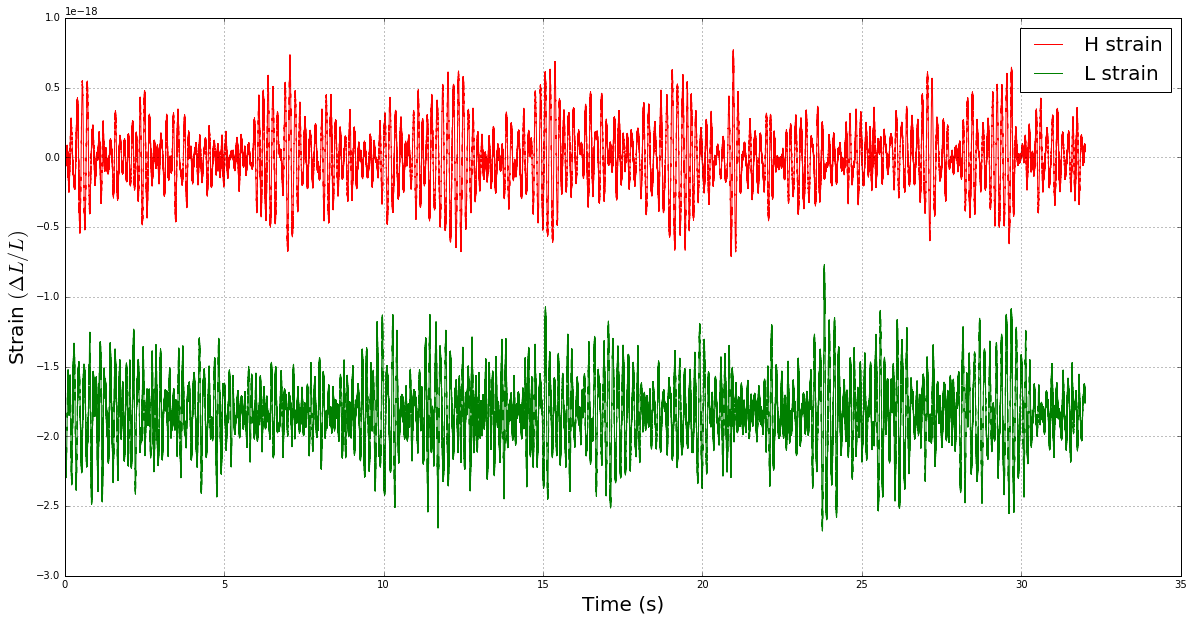

In [5]:
plt.figure(figsize=(20,10))
plt.plot(tH-1126259446, strainH,'r',label='H strain')
plt.plot(tL-1126259446, strainL,'g',label='L strain')
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel(r'Strain $(\Delta L/L)$',fontsize=20)
plt.grid("on")
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Plotting the Periodogram

In [14]:
#FFT of the data
FFT_H = np.fft.fft(strainH)
FFT_L = np.fft.fft(strainL)

# x-axis in frequency space
x = np.fft.fftfreq(len(tH),d=1/4096)
y = np.fft.fftfreq(len(tL),d=1/4096)

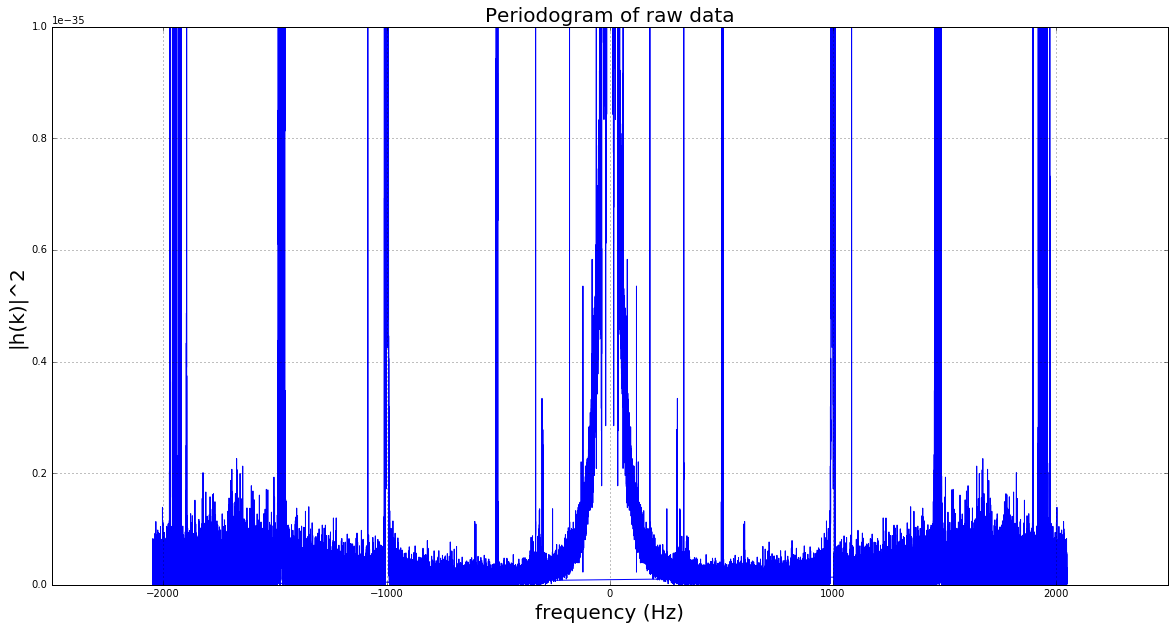

In [31]:
# periodogram of raw data

plt.figure(figsize=(20,10))
plt.axis([-2500,2500, 0, 1e-35])
plt.plot(x, np.abs(FFT_H)**2)
plt.grid("on")
plt.title("Periodogram of raw data", fontsize=20)
plt.xlabel("frequency (Hz)", fontsize = 20)
plt.ylabel("|h(k)|^2", fontsize=20)
plt.show()

# Filtering the Data

In [23]:
# parameters of filter functions :

j=190
g=115
n=9
u=0
k=20
m=5

A=180
B=0.5
C=120
D=0.2
E=300
F=5
G=60
H=1
J=256
K=0.2

# transfer step function type1: pick out chosen regions
# j: position, g,n: width
F1=((1/(1+((x+j)/g)**(n*2)))+(1/(1+((x-j)/g)**(n*2)))) 


# transfer step function type2: remove chosen regions
# u: position, k,m: width
F2=(1/(1+(k/(x-u))**(2*m)))

# transfer gauss function F3~F7: remove chosen points
# A: position, B: width
F3=(1- np.exp(-(y-A)**2/(2*(B**2))))*(1- np.exp(-(y+A)**2/(2*(B**2))))
F4=(1- np.exp(-(y-C)**2/(2*(D**2))))*(1- np.exp(-(y+C)**2/(2*(D**2))))
F5=(1- np.exp(-(y-E)**2/(2*(F**2))))*(1- np.exp(-(y+E)**2/(2*(F**2))))
F6=(1- np.exp(-(y-G)**2/(2*(H**2))))*(1- np.exp(-(y+G)**2/(2*(H**2))))
F7=(1- np.exp(-(y-J)**2/(2*(K**2))))*(1- np.exp(-(y+J)**2/(2*(K**2))))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in true_divide


In [34]:
# Applying the filters in the frequency space

# First filter, saves region around 50-350Hz
H1 = FFT_H*F1
PH1 = np.square(np.absolute(H1))
WaveH1 = np.fft.ifft(H1)

# Second filter, removes frequencies around 0Hz
H2 = H1*F2
PH2 = np.square(np.absolute(H2))
WaveH2 = np.fft.ifft(H2)

# Using gauss filter to remove spectral lines
H3 = H2*F3*F4*F5*F6*F7
PH3 = np.square(np.absolute(H3))
WaveH3 = np.fft.ifft(H3)

# Using all filters together in the L strain
L = FFT_L*F1*F2*F3*F4*F5*F6*F7
WaveL = np.fft.ifft(L)

# Plotting the waveform and the periodogram after filtering

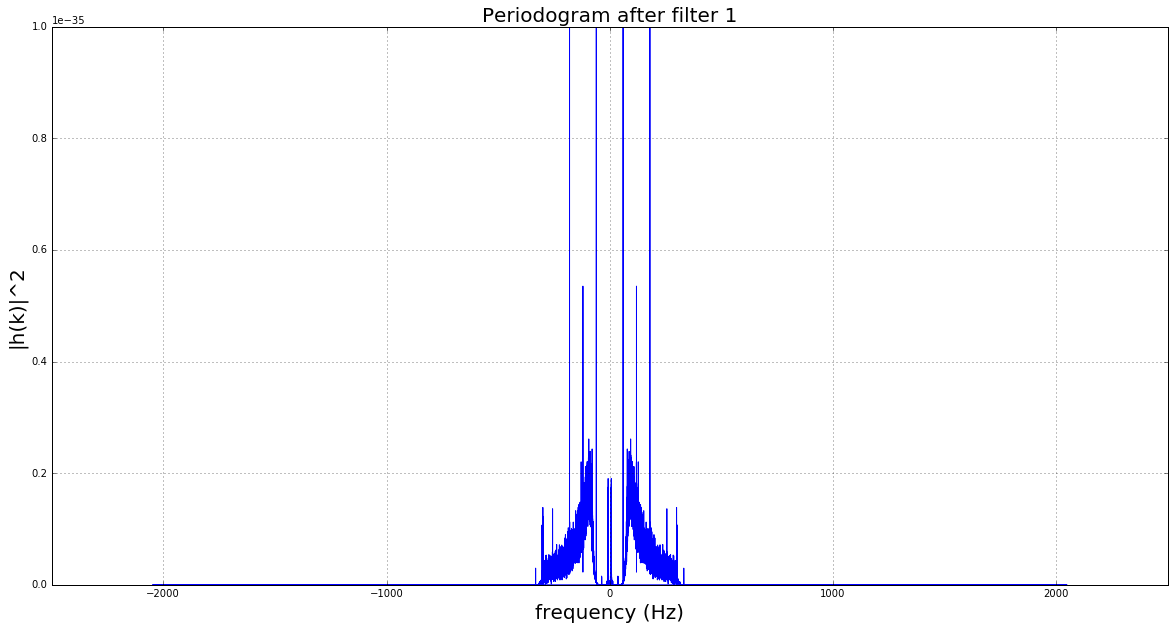

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


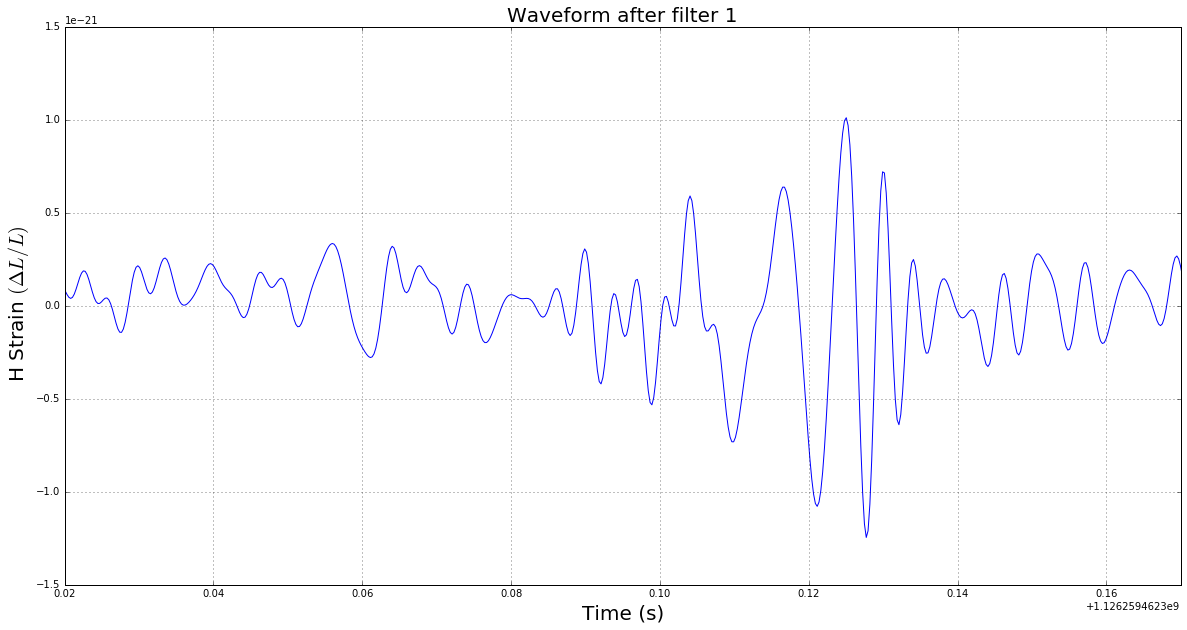

In [49]:
# H strain after filter 1:

plt.figure(figsize=(20,10))
plt.axis([-2500,2500, 0, 1e-35])
plt.plot(x, PH1)
plt.grid("on")
plt.title("Periodogram after filter 1", fontsize=20)
plt.xlabel("frequency (Hz)",fontsize=20)
plt.ylabel("|h(k)|^2",fontsize=20)
plt.show()


plt.figure(figsize=(20,10))
plt.plot(tH, WaveH1)
plt.axis([-0.1+1126259462.42,0.05+1126259462.42,-1.5e-21,1.5e-21])
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel(r' H Strain $(\Delta L/L)$',fontsize=20)
plt.grid("on")
plt.legend(loc=1, prop={'size': 20})
plt.title("Waveform after filter 1", fontsize=20)
plt.show()

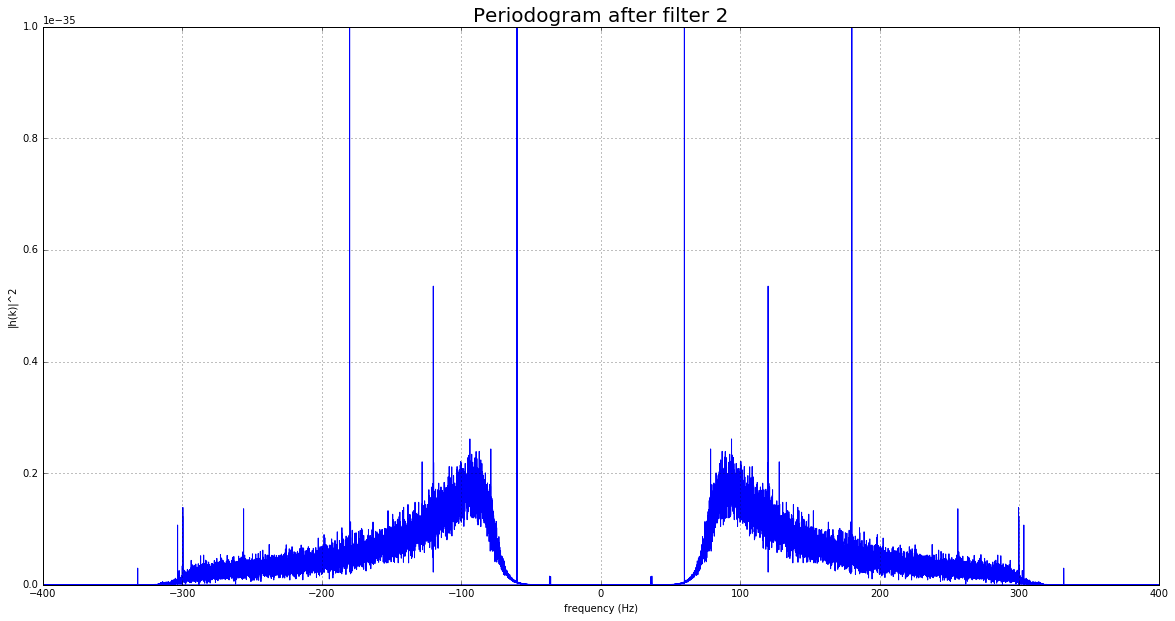

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


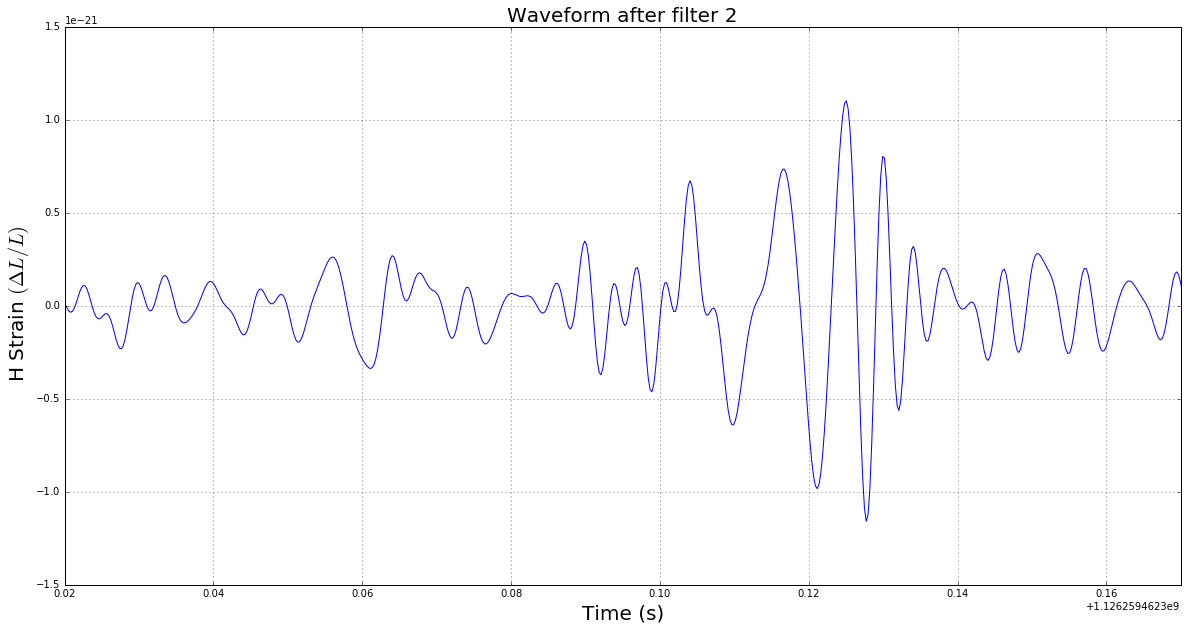

In [47]:
# H strain after filter 2:

plt.figure(figsize=(20,10))
plt.axis([-400,400, 0, 1e-35])
plt.plot(x, PH2)
plt.grid("on")
plt.title("Periodogram after filter 2", fontsize=20)
plt.xlabel("frequency (Hz)",fontsize=20)
plt.ylabel("|h(k)|^2",fontsize=20)
plt.show()


plt.figure(figsize=(20,10))
plt.plot(tH, WaveH2)
plt.xlabel('Time (s)',fontsize=20)
plt.axis([-0.1+1126259462.42,0.05+1126259462.42,-1.5e-21,1.5e-21])
plt.ylabel(r' H Strain $(\Delta L/L)$',fontsize=20)
plt.grid("on")
plt.legend(loc=1, prop={'size': 20})
plt.title("Waveform after filter 2", fontsize=20)
plt.show()

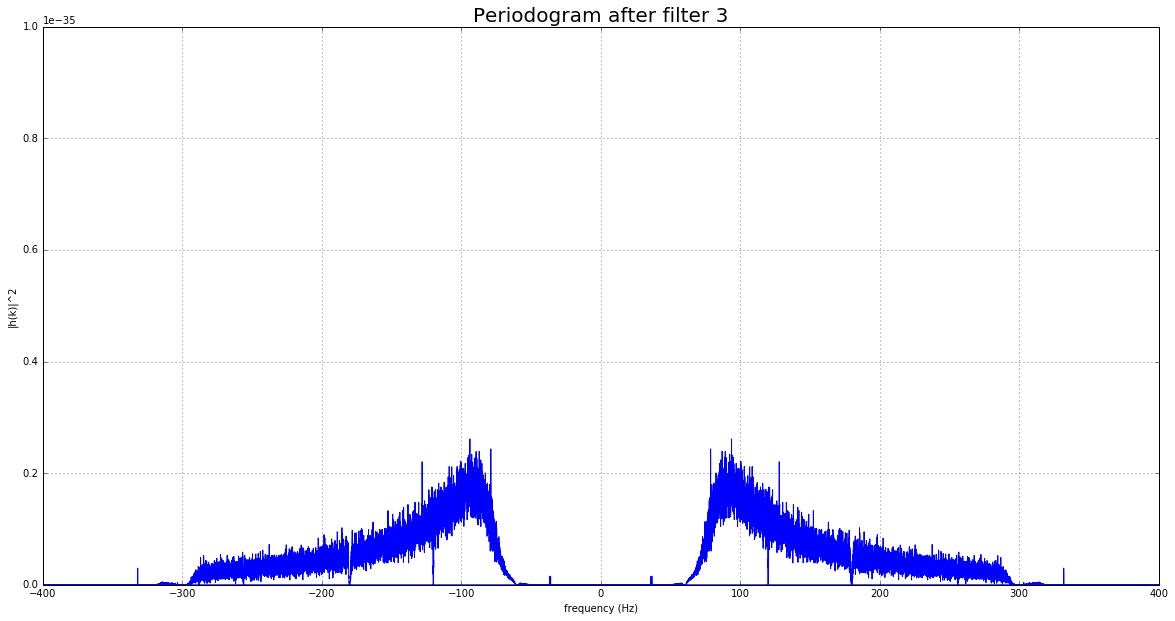

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


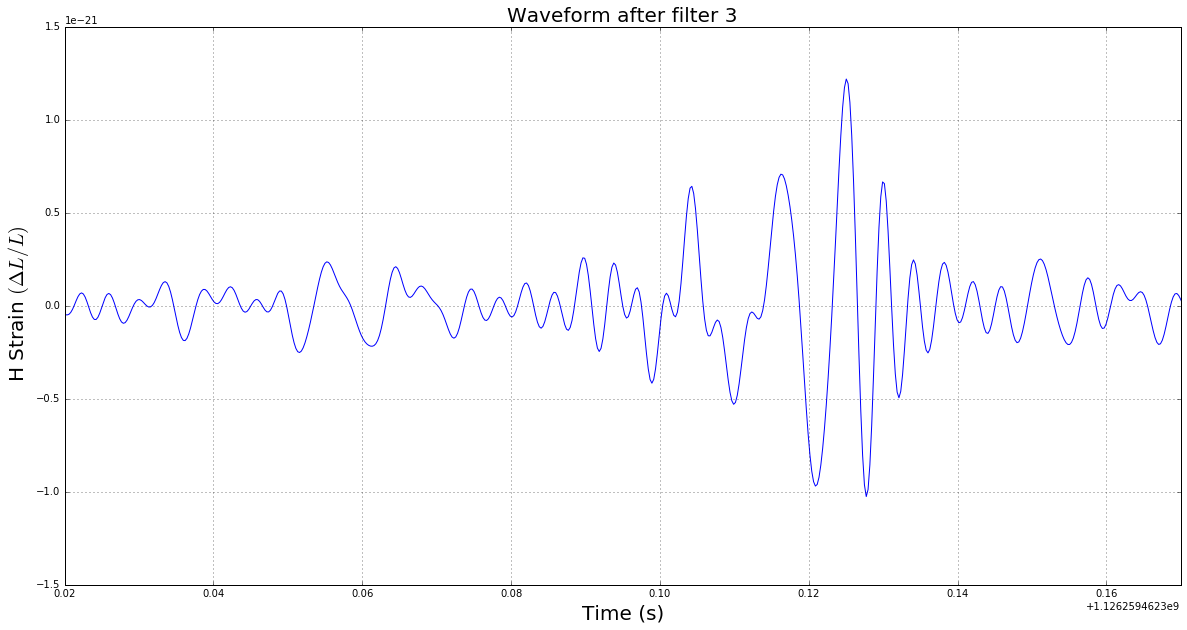

In [46]:
# H strain after filter 3:

plt.figure(figsize=(20,10))
plt.axis([-400,400, 0, 1e-35])
plt.plot(x, PH3)
plt.grid("on")
plt.title("Periodogram after filter 3", fontsize=20)
plt.xlabel("frequency (Hz)",fontsize=20)
plt.ylabel("|h(k)|^2",fontsize=20)
plt.show()


plt.figure(figsize=(20,10))
plt.plot(tH, WaveH3)
plt.axis([-0.1+1126259462.42,0.05+1126259462.42,-1.5e-21,1.5e-21])
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel(r' H Strain $(\Delta L/L)$',fontsize=20)
plt.grid("on")
plt.legend(loc=1, prop={'size': 20})
plt.title("Waveform after filter 3", fontsize=20)
plt.show()

# Result

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


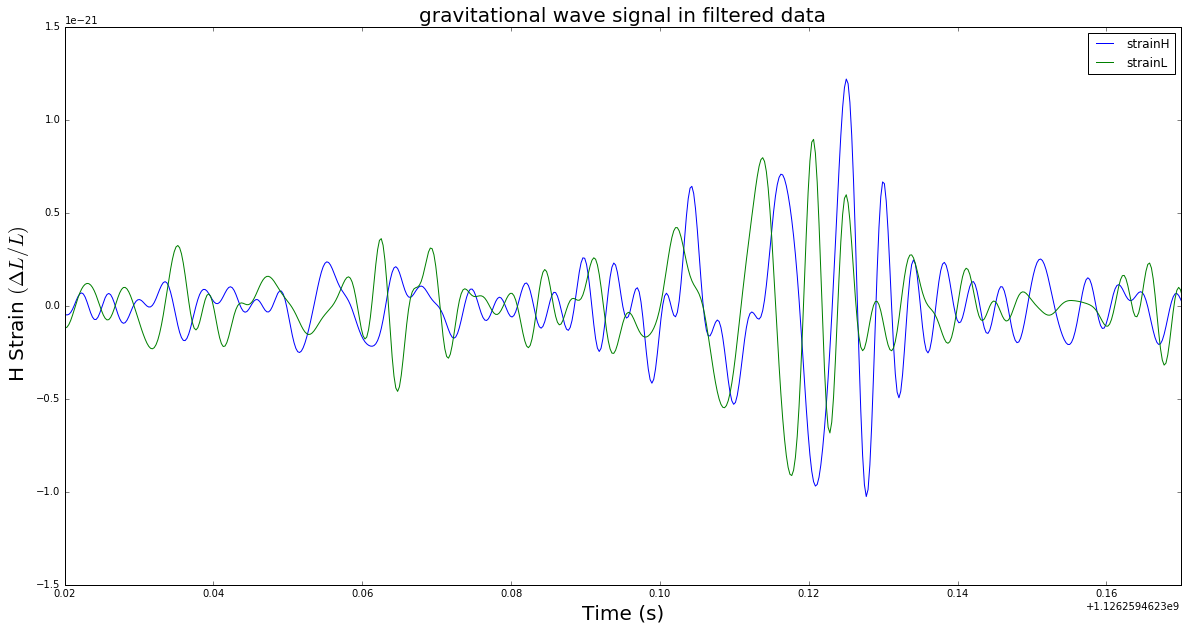

In [52]:
# resulting gravitational wave

plt.figure(figsize=(20,10))
plt.plot(tH, WaveH,label = "strainH")
plt.plot(tH, WaveL,label = "strainL")
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel(r' H Strain $(\Delta L/L)$',fontsize=20)
plt.axis([-0.1+1126259462.42,0.05+1126259462.42,-1.5e-21,1.5e-21])
plt.title("gravitational wave signal in filtered data",fontsize=20)
plt.legend()
plt.show()

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


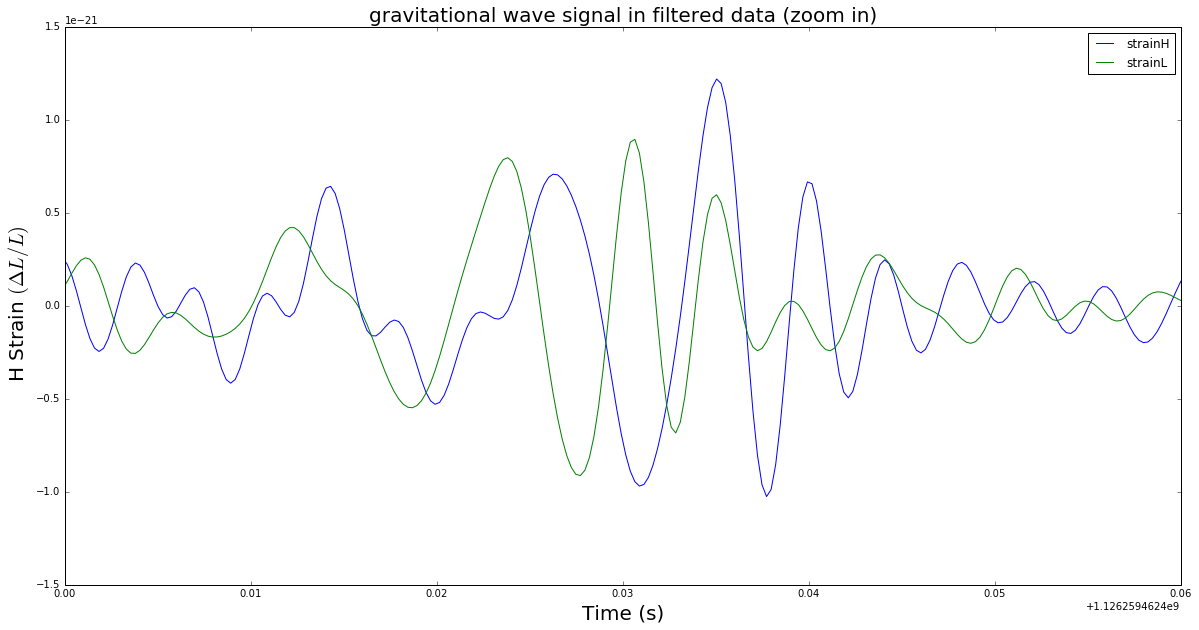

In [54]:
# resulting gravitational wave (graph zoomed in)

plt.figure(figsize=(20,10))
plt.plot(tH, WaveH,label = "strainH")
plt.plot(tH, WaveL,label = "strainL")
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel(r' H Strain $(\Delta L/L)$',fontsize=20)
plt.axis([-0.03+1126259462.42,0.03+1126259462.42,-1.5e-21,1.5e-21])
plt.title("gravitational wave signal in filtered data (zoom in)",fontsize=20)
plt.legend()
plt.show()

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


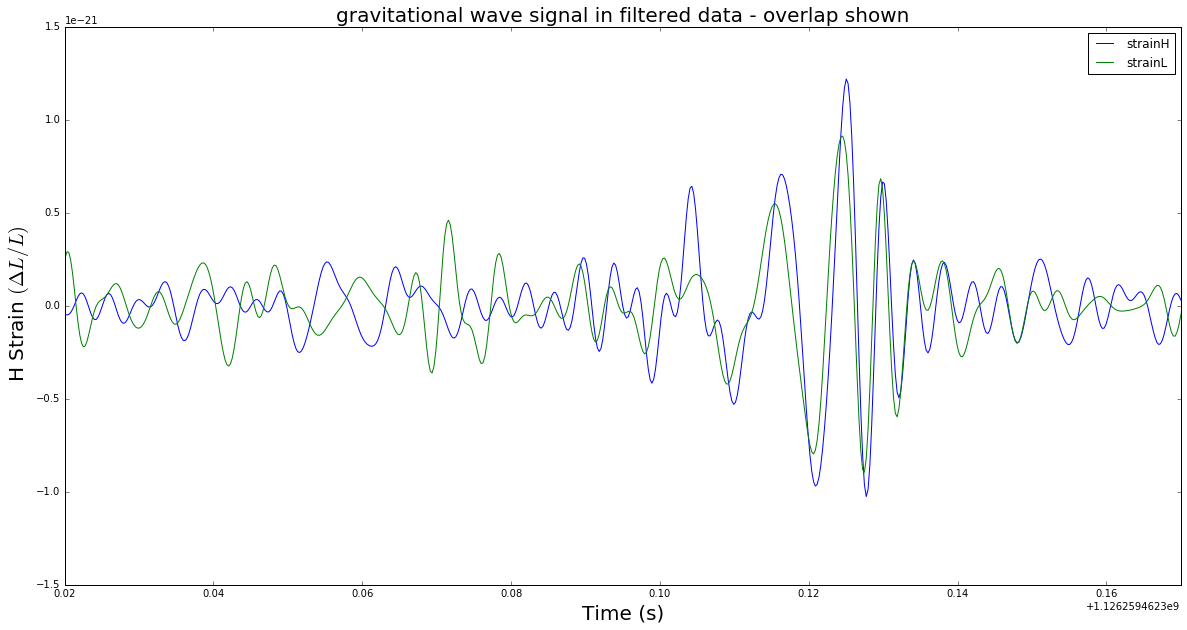

In [55]:
# showing the grvitational wave overlap

WaveL_shift = -np.roll(WaveL,int(0.007*4096))

plt.figure(figsize=(20,10))
plt.plot(tH, WaveH,label = "strainH")
plt.plot(tH, WaveL,label = "strainL")
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel(r' H Strain $(\Delta L/L)$',fontsize=20)
plt.axis([-0.1+1126259462.42,0.05+1126259462.42,-1.5e-21,1.5e-21])
plt.title("gravitational wave signal in filtered data - overlap shown",fontsize=20)
plt.legend()
plt.show()

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


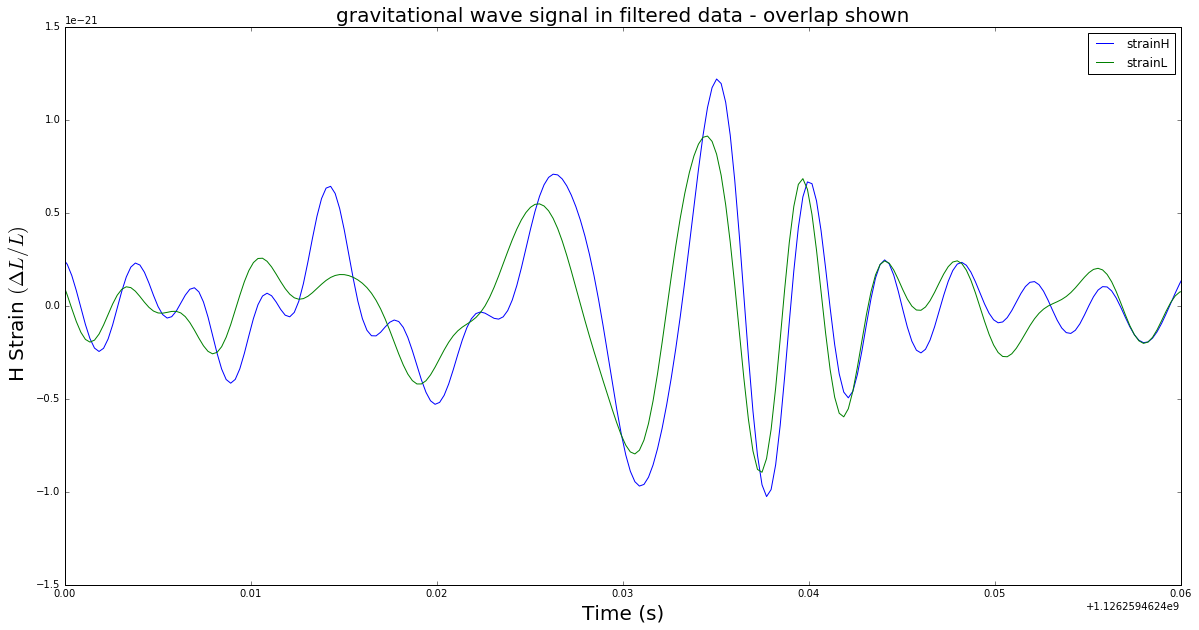

In [56]:
# resulting gravitational wave showing overlap (graph zoomed in)

plt.figure(figsize=(20,10))
plt.plot(tH, WaveH,label = "strainH")
plt.plot(tH, WaveL_shift,label = "strainL")
plt.xlabel('Time (s)',fontsize=20)
plt.ylabel(r' H Strain $(\Delta L/L)$',fontsize=20)
plt.axis([-0.03+1126259462.42,0.03+1126259462.42,-1.5e-21,1.5e-21])
plt.title("gravitational wave signal in filtered data - overlap shown",fontsize=20)
plt.legend()
plt.show()

## Testing Filter Using Sum of Sine Wave

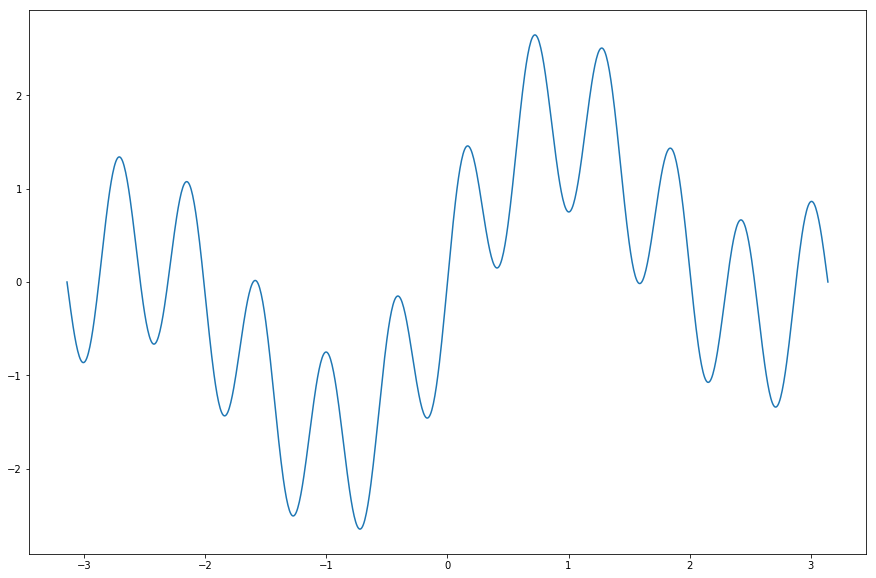

In [14]:
x=np.linspace(-np.pi, np.pi,1000)
plt.figure(figsize=(15,10))
plt.plot(x,np.sin(x)+np.sin(2*x)+np.sin(11*x))
plt.show()

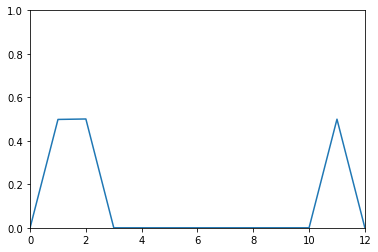

In [16]:
sample=np.sin(x)+np.sin(2*x)+np.sin(11*x)
h1=np.fft.rfft(sample)
A=signal.periodogram(sample,1000)
plt.axis([0,12, 0, 1])
plt.plot(A[0],A[1])
plt.show()

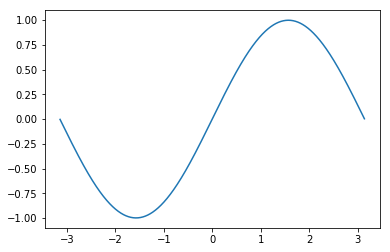

In [19]:
FA=h1/(1+((A[0][:501]-1)/0.01)**(16))
Aprime=np.fft.irfft(FA)
plt.plot(x,Aprime)
plt.show()